In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
from PIL import Image
from tqdm import tqdm

import os

In [4]:
fno=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain tumor detection/no'):
    for filename in filenames:
        a= os.path.join(dirname, filename)
        fno.append(a)
len(fno),fno[1]  

(98, '/content/drive/MyDrive/brain tumor detection/no/no 100.jpg')

In [5]:
fyes=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain tumor detection/yes'):
    for filename in filenames:
        a= os.path.join(dirname, filename)
        fyes.append(a)
len(fyes),fyes[1]   

(155, '/content/drive/MyDrive/brain tumor detection/yes/Y168.jpg')

In [6]:
z = [0]* len(fno)
one = [1]*len(fyes)

In [7]:
dfn = pd.DataFrame(list(zip(fno,z )),
               columns =['filepath', 'label'])
dfy = pd.DataFrame(list(zip(fyes,one )),
               columns =['filepath', 'label'])

df = dfn.append(dfy,ignore_index = True )
df.head()

<ipython-input-7-6cfffef235dc>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfn.append(dfy,ignore_index = True )


,filepath,label
0,/content/drive/MyDrive/brain tumor detection/n...,0
1,/content/drive/MyDrive/brain tumor detection/n...,0
2,/content/drive/MyDrive/brain tumor detection/n...,0
3,/content/drive/MyDrive/brain tumor detection/n...,0
4,/content/drive/MyDrive/brain tumor detection/n...,0


In [8]:
img = Image.open(fno[2])
a = np.asarray(img)

df1 = []
for r in range (len(fno)):
    img = Image.open(fno[r])
    img= img.resize((224,224))
    
    a=np.asarray(img)
    df1.append(a)
    
for r in range(len(fyes)):
    img=Image.open(fyes[r])
    img=img.resize((224,224))
    a= np.asarray(img)
    df1.append(a)
    
df["Imagearr"] = df1

In [9]:
import cv2
o = df.Imagearr[5]
og = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
Image.fromarray(og)
print(og.shape)

(224, 224)


In [10]:
Image.fromarray(o)
print(o.shape)

(224, 224, 3)


In [11]:
df["GLCM-Contrast-1"] = ''
df["GLCM-Contrast-2"] = ''
df["GLCM-Contrast-3"] = ''
df["GLCM-Contrast-4"] = ''

df["GLCM-Dissimilarity-1"] =''
df["GLCM-Dissimilarity-2"] =''
df["GLCM-Dissimilarity-3"] =''
df["GLCM-Dissimilarity-4"] =''
    
df["GLCM-Homogeneity-1"]=''
df["GLCM-Homogeneity-2"]=''
df["GLCM-Homogeneity-3"]=''
df["GLCM-Homogeneity-4"]=''
    
df["GLCM-Energy-1"]=''
df["GLCM-Energy-2"]=''
df["GLCM-Energy-3"]=''
df["GLCM-Energy-4"]=''

df["GLCM-Correlation-1"] =''
df["GLCM-Correlation-2"] =''
df["GLCM-Correlation-3"] =''
df["GLCM-Correlation-4"] =''

df["GLCM-ASM-1"]=''
df["GLCM-ASM-2"]=''
df["GLCM-ASM-3"]=''
df["GLCM-ASM-4"]=''

In [12]:
df.head()

,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-3,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4
0,/content/drive/MyDrive/brain tumor detection/n...,0,"[[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...",,,,,,,,...,,,,,,,,,,
1,/content/drive/MyDrive/brain tumor detection/n...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
2,/content/drive/MyDrive/brain tumor detection/n...,0,"[[[1, 1, 1], [2, 2, 2], [3, 3, 3], [3, 3, 3], ...",,,,,,,,...,,,,,,,,,,
3,/content/drive/MyDrive/brain tumor detection/n...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
4,/content/drive/MyDrive/brain tumor detection/n...,0,"[[3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1,...",,,,,,,,...,,,,,,,,,,


In [13]:
def fxnglcm(img,i):
    from skimage.feature import greycomatrix,greycoprops
    import skimage.feature as feature


    graycom = feature.graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)


    c = feature.graycoprops(graycom, 'contrast')
    d = feature.graycoprops(graycom, 'dissimilarity')
    h = feature.graycoprops(graycom, 'homogeneity')
    e = feature.graycoprops(graycom, 'energy')
    corr = feature.graycoprops(graycom, 'correlation')
    ASM = feature.graycoprops(graycom, 'ASM')
    c = np.squeeze(c)
    d = np.squeeze(d)
    h = np.squeeze(h)
    e = np.squeeze(e)
    corr = np.squeeze(corr)
    asm = np.squeeze(ASM)
    
    df["GLCM-Contrast-1"][i] = c[0]
    df["GLCM-Contrast-2"][i] = c[1]
    df["GLCM-Contrast-3"][i] = c[2]
    df["GLCM-Contrast-4"][i] = c[3]

    df["GLCM-Dissimilarity-1"][i] =d[0]
    df["GLCM-Dissimilarity-2"][i] =d[1]
    df["GLCM-Dissimilarity-3"][i] =d[2]
    df["GLCM-Dissimilarity-4"][i] =d[3]
    
    df["GLCM-Homogeneity-1"][i] =h[0]
    df["GLCM-Homogeneity-2"][i]=h[1]
    df["GLCM-Homogeneity-3"][i] =h[2]
    df["GLCM-Homogeneity-4"][i] =h[3]
    
    df["GLCM-Energy-1"][i] =e[0]
    df["GLCM-Energy-2"][i] =e[1]
    df["GLCM-Energy-3"][i] =e[2]
    df["GLCM-Energy-4"][i] =e[3]

    df["GLCM-Correlation-1"][i] =corr[0]
    df["GLCM-Correlation-2"][i] =corr[1]
    df["GLCM-Correlation-3"][i] =corr[2]
    df["GLCM-Correlation-4"][i] =corr[3]

    df["GLCM-ASM-1"][i] =asm[0]
    df["GLCM-ASM-2"][i] =asm[1]
    df["GLCM-ASM-3"][i] =asm[2]
    df["GLCM-ASM-4"][i] =asm[3]
    
    
    
    return 

In [14]:
def glcmfiller(imgarr,i,gry):
    import cv2
    if imgarr.shape !=(224, 224):
        og = cv2.cvtColor(imgarr,cv2.COLOR_BGR2GRAY)
        fxnglcm(og,i)
        df["gry"][i] = og
    else:
        fxnglcm(imgarr,i)
        df["gry"][i] = imgarr
    return

    

In [15]:
df["gry"]=""
for i in tqdm(range(253)):
    x = glcmfiller(df.loc[i,"Imagearr"],i,df.loc[i,"gry"])
    

100%|██████████| 253/253 [00:14<00:00, 17.02it/s]


In [16]:


df.head(1)



,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4,gry
0,/content/drive/MyDrive/brain tumor detection/n...,0,"[[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...",235.564061,460.948099,258.578916,458.563052,7.481622,10.297774,7.117673,...,0.306349,0.956906,0.915648,0.952696,0.916085,0.097156,0.09405,0.098157,0.09385,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."


In [17]:
df_lbp = df[["filepath","label","gry"]].copy(deep = True)
df_lbp.head()

,filepath,label,gry
0,/content/drive/MyDrive/brain tumor detection/n...,0,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
1,/content/drive/MyDrive/brain tumor detection/n...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,/content/drive/MyDrive/brain tumor detection/n...,0,"[[1, 2, 3, 3, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 3,..."
3,/content/drive/MyDrive/brain tumor detection/n...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,/content/drive/MyDrive/brain tumor detection/n...,0,"[[3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1,..."


In [18]:
df_lbp["gry"][3].shape,df_lbp["gry"][4].shape,df_lbp["gry"][5].shape,df_lbp["gry"][6].shape

((224, 224), (224, 224), (224, 224), (224, 224))

In [19]:
df.to_excel("./glcm.xlsx")

In [20]:


df_lbp.head(2)



,filepath,label,gry
0,/content/drive/MyDrive/brain tumor detection/n...,0,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
1,/content/drive/MyDrive/brain tumor detection/n...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


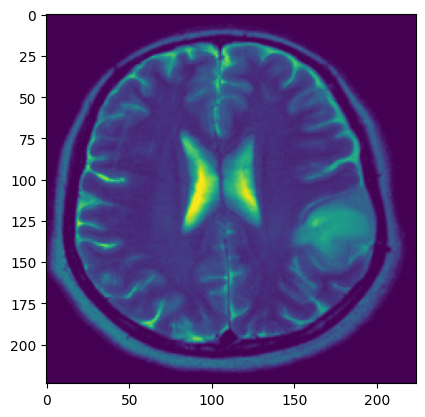

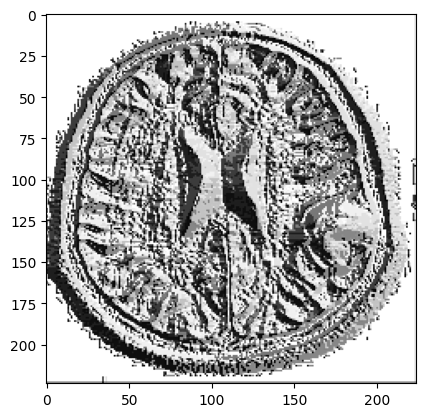

LBP Program is finished


In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel ___ value is greater than or equal___ # to center pixel values then ____ # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when  # neighbourhood value of a center # pixel value is null i.e. values # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
img_lbp = np.zeros((224, 224),
                   np.uint8)
   
for i in range(0, 224):
    for j in range(0, 224):
        img_lbp[i, j] = lbp_calculated_pixel(df_lbp["gry"][3], i, j)
plt.imshow(df_lbp["gry"][3])
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()
   
print("LBP Program is finished")

In [22]:
import matplotlib.pyplot as plt

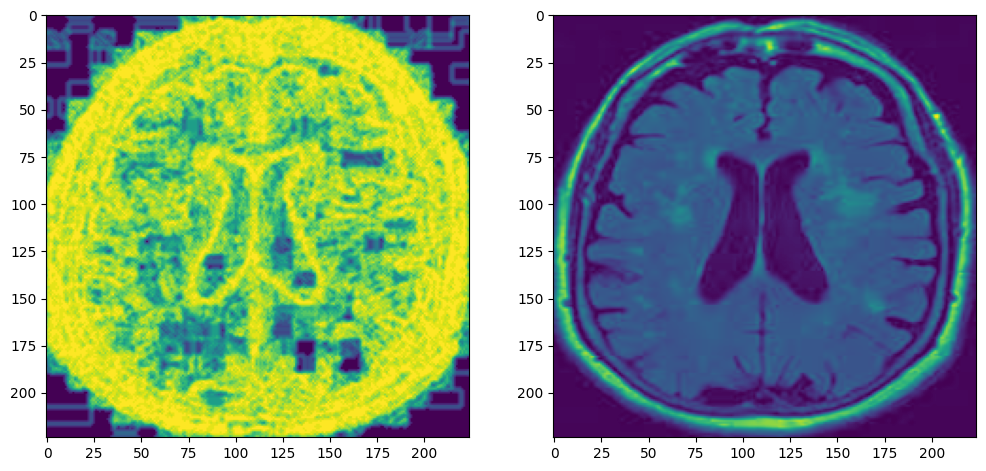

In [23]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(og,disk(2))

fig = plt.figure(figsize = (12,12)) 
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(entropy_img)
ax2.imshow(og)
plt.show()

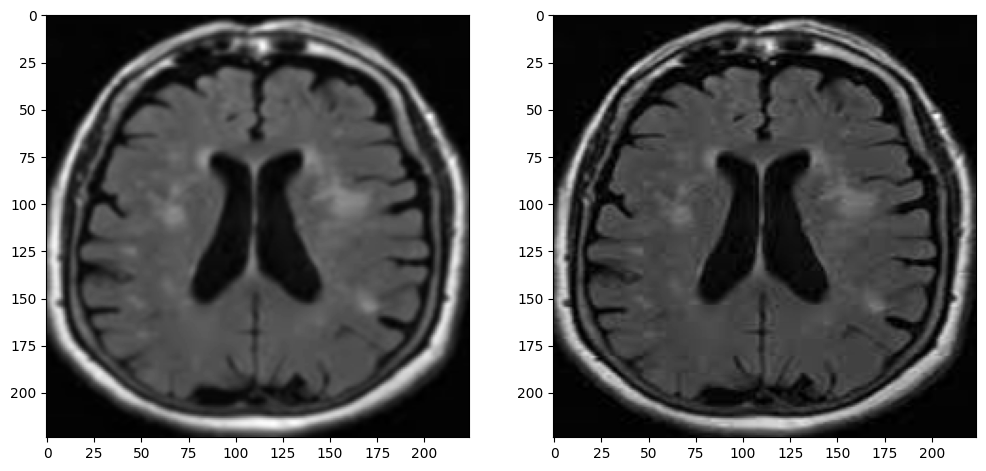

In [24]:
from scipy import ndimage as nd
from scipy import misc

fig = plt.figure(figsize = (12,12))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121) # On the Left
ax2 = fig.add_subplot(122) # Right Side
gaussian_img = nd.gaussian_filter(og,sigma = 1)
ax1.imshow(gaussian_img)
ax2.imshow(og)
plt.show()

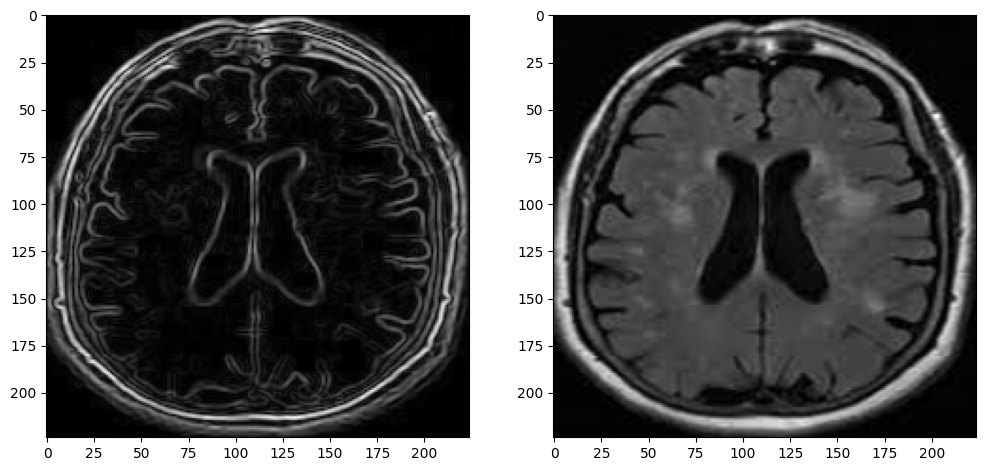

In [25]:
from skimage.filters import sobel

sobel_img = sobel(og)

fig = plt.figure(figsize = (12,12))
  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(sobel_img)
ax2.imshow(og)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

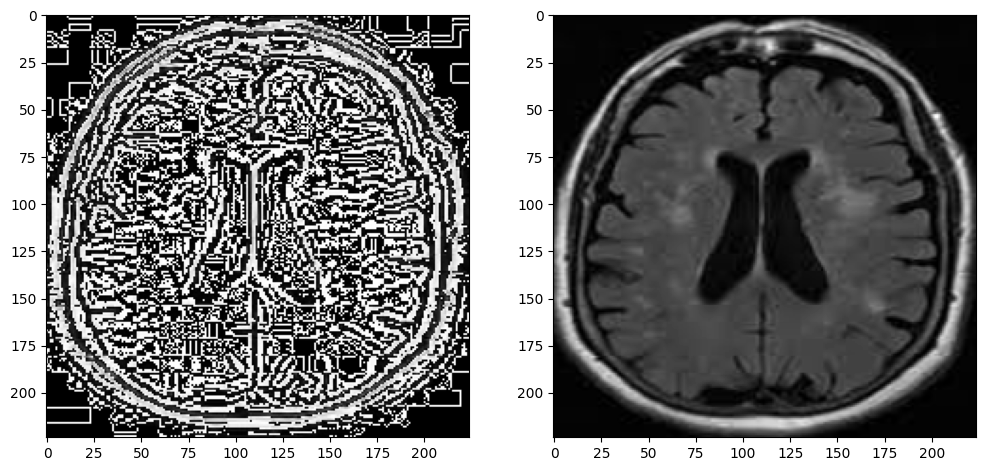

In [26]:
from scipy.ndimage import laplace

laplace_img = laplace(og)
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(laplace_img)
ax2.imshow(og)
plt.show

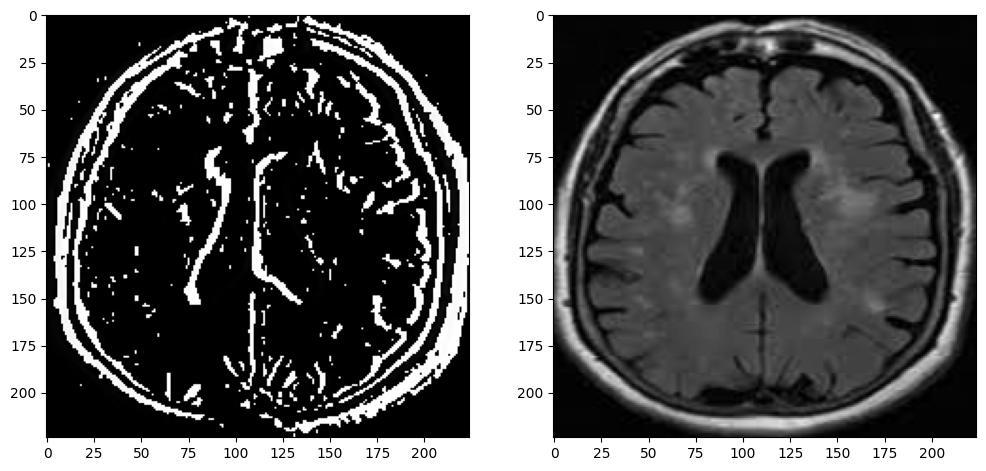

In [27]:
from skimage.filters import gabor
from skimage import io

real,gabor_img = gabor(og,frequency = 0.9)

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gabor_img)
ax2.imshow(og)

plt.show()

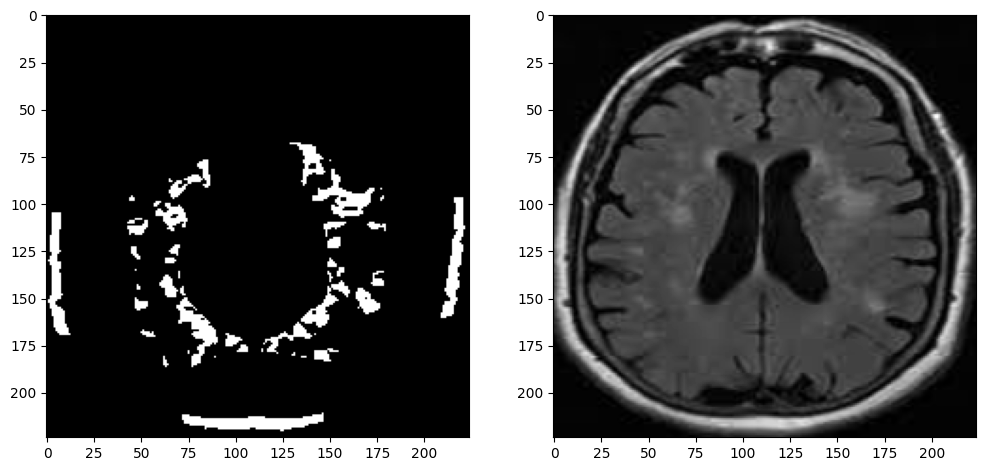

In [28]:
from skimage.filters import hessian

hessian_img = hessian(og,sigmas = range(1,100,1))
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(hessian_img)
ax2.imshow(og)

plt.show()

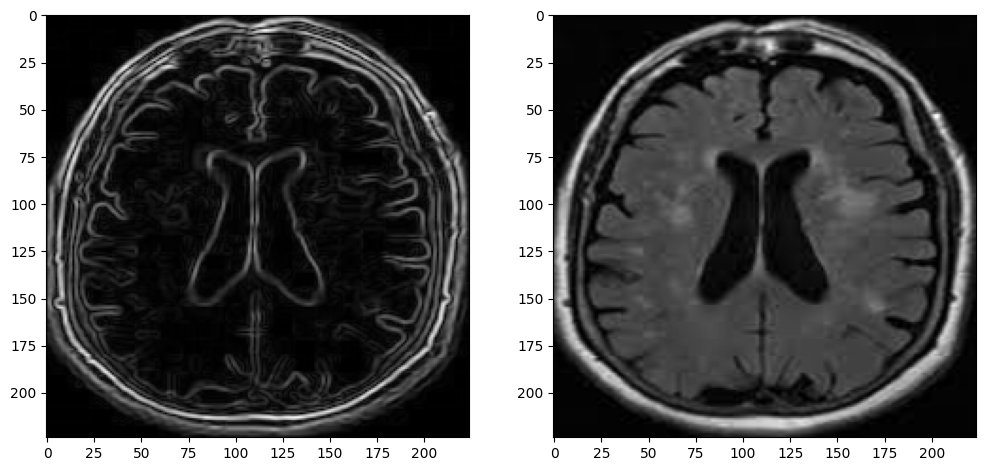

In [29]:
from skimage.filters import prewitt

prewitt_img = prewitt(og)
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(prewitt_img)
ax2.imshow(og)

plt.show()

In [30]:
import seaborn as sns
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [31]:
df = df.drop(["Imagearr","filepath"],axis = 1)
df = df.sample(frac=0.6,ignore_index = True,random_state=27)
y = df.label
df = df.drop("label",axis =1)
df = df.drop("gry",axis =1)
print(y.head(1))

df.head(1)

0    1
Name: label, dtype: int64


,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,GLCM-Dissimilarity-4,GLCM-Homogeneity-1,GLCM-Homogeneity-2,...,GLCM-Energy-3,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4
0,153.921425,333.368477,206.086063,323.037101,5.471753,7.958636,5.823731,7.825937,0.494605,0.409485,...,0.171568,0.164056,0.955358,0.90305,0.940216,0.906055,0.030631,0.026885,0.029436,0.026915


In [32]:
X = df

In [33]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((121, 24), (121,), (31, 24), (31,))

In [35]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs','saga'], 'max_iter':[50000]}# l1 lasso l2 ridge
lr=LogisticRegression()

In [36]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'max_iter': 50000, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7442307692307694


In [37]:
yhat=logreg_cv.predict(X_test)
logreg_cv.score(X_test, y_test)

0.7096774193548387

In [38]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Tumor', 'Tumor Detected']); ax.yaxis.set_ticklabels(['No Tumor', 'Tumor Detected'])

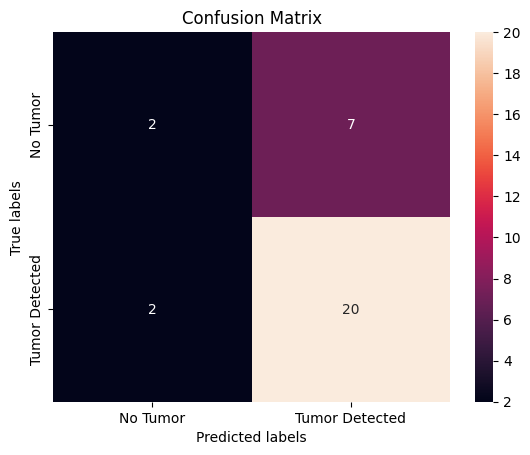

In [39]:


plot_confusion_matrix(y_test,yhat)



In [40]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [41]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
accuracy : 0.6621794871794873


In [42]:
knn_cv.score(X_test, y_test)

0.5806451612903226

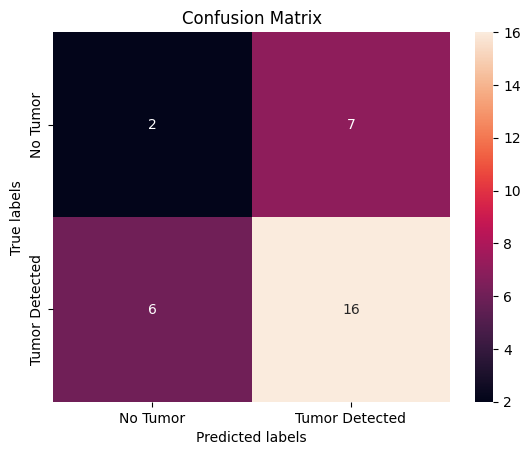

In [43]:
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [44]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [45]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.776923076923077


In [46]:
tree_cv.score(X_test,y_test)

0.5483870967741935

In [47]:
d = {"Logistic Regression" : logreg_cv.score(X_test, y_test)}

In [48]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.7,random_state=2)
parameters = {'kernel':('linear',"sigmoid"),
              'C': [1000,100,300]}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=5)
tqdm(svm_cv.fit(X_train, y_train))

0it [00:00, ?it/s]

In [50]:
svm_cv.score(X_test,y_test)

0.5794392523364486

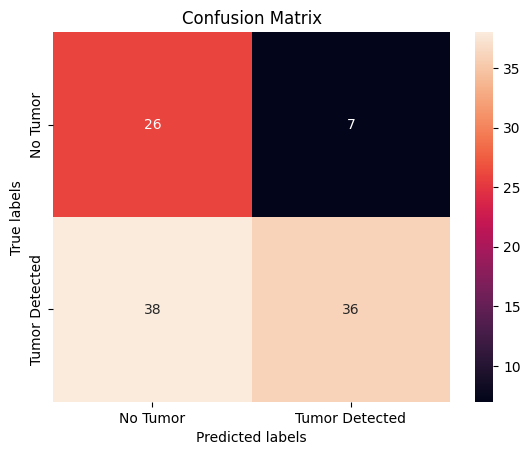

In [51]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)